[Code file for all Chapters](https://github.com/PacktPublishing/Python-for-Finance-Second-Edition)

In this chapter, we will discuss basic concepts and several widely used functions related to Python. In particular we will discuss the following topics:

* Variable assignment and writing our own programs
*  Writing a Python function
* Data input
* Data manipulation
* Data output

### Variable assignment and writing our own programs

Assume that we deposit `$100` in the bank today. What will be the value 3 years later if the bank offers us an annual deposit rate of `1.5%?` The related codes is shown here:

In [1]:
pv = 100

In [2]:
pv*(1+0.015)**3

104.56783749999997

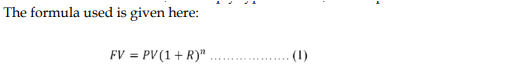

Here, 
* `FV` is the future value, 
* `PV` is the present value, 
* `R` is the period deposit rate 
* `n` is the number of periods. 

In this case, `R` is the annual rate of **0.015** while `n` is **3**.

To show all variables or function, we use the `dir()` function:

In [3]:
print(dir())

['In', 'Out', '_', '_2', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'pv', 'quit']


To find out all built-in functions, we type `dir("__builtings__")`. The output is shown here:

In [4]:
print(dir("__builtings__"))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


### Writing a Python function

In [5]:
def fv(pv,r,n):
    """Objective: estimate future value"""
    return pv*(1+r)**n

In [6]:
fv(100,0.015,3)

104.56783749999997

In [7]:
fv.__doc__

'Objective: estimate future value'

In [8]:
def pv(fv,r,n):
    """Objective: estimate present value"""
    return fv/(1+r)**n

In [9]:
pv(r=0.1,fv=100,n=1)

90.9090909090909

In [10]:
help(pv)

Help on function pv in module __main__:

pv(fv, r, n)
    Objective: estimate present value



### Python loops

A loop is used to repeat the same task with slightly different input or other factors

In [11]:
import numpy as np

cashFlows=np.array([-100,50,40,30])

In [12]:
for cash in cashFlows:
    print(cash)

-100
50
40
30


One type of data is called a **tuple**, where we use a pair of parentheses, `(` `)`, to include all input values. One feature of a tuple variable is that we cannot modify its value. This special property could be valuable if some our variables should never be changed.

In [13]:
y=(7,8,9)

y[0]=10

TypeError: 'tuple' object does not support item assignment

A tuple is different from a **dictionary**, which stores data with key-value pairs. It is not ordered and it requires that the keys are hashable. Unlike a tuple, the value for a dictionary can be modified.

Assuming that we invest `$100` today and `$30` next year, the future cash inflow will be `$10`, `$40`, `$50`, `$45`, and `$20` at the end of each year for the next 5 years, starting at the
end of the second year; see the following timeline and its corresponding cash flows:

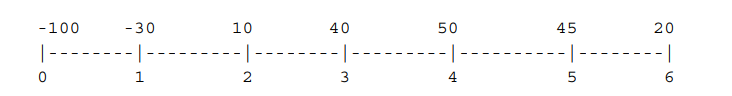

What is the **Net Present Value (NPV)** if the **discount rate is 3.5%**? 

* NPVis defined as the present values of all benefits minus the present values of all costs. 

If a cash inflow has a positive sign while a cash outflow has a negative sign, then NPV can be defined conveniently as the 
* summation of the present values of all cash flows. 

The **present value** of **one future value** is estimated by applying the following formula:

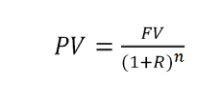

We just want to write an `npv()` function which applies the preceding equation `n` times, where `n` is the number of cash flows.

In [14]:
def npv(rate, cashflows):
    total = 0.0
    for i in range(0,len(cashflows)):
        total += cashflows[i] / (1 + rate)**i
    return total

In [15]:
r=0.035
cashflows=[-100,-30,10,40,50,45,20]

In [17]:
npv(r,cashflows)

14.158224763725372

By using a loop, we can repeat the same task with different inputs. For example, we plan to print a set of values. The following is such an example for a **while loop**:

In [18]:
i=1

while(i<10):
    print(i)
    i+=1

1
2
3
4
5
6
7
8
9


The following program will report a discount (or any number of discount rates), making its corresponding NPV equal zero. Assume the cash flow will be `550`, `-500`,`-500`, `-500`, and `1000` at time `0`, at the end of each year of the next 4 years.

Write a Python program to find out which **discount rate makes NPV equal zero**. Since the direction of cash flows changes twice, we might have two different rates making NPV equal zero:

In [19]:
cashFlows=(550,-500,-500,-500,1000)
r=0

while(r<1.0):
    r+=0.000001
    np_value=npv(r,cashFlows)
    if abs(np_value)<=0.0001:
        print(r)

0.07163900000005098
0.33673299999790873


When we need to use a few math functions, we can `import` the **math module** first:

In [20]:
import math
print(dir(math))

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'pi', 'pow', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


In [21]:
math.pi

3.141592653589793

The `sqrt()`, **square root**, function is contained in the `math` module. Thus, to use the `sqrt()` function, we need to use `math.sqrt()`; see the following code:

In [22]:
math.sqrt(2)

1.4142135623730951

If we want to call those functions directly, we can use `from math import *`

In [23]:
from math import *

sqrt(3)

1.7320508075688772

To learn about individual embedded functions, we can use the `help()` function

In [24]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



### Data input

In [25]:
with open("test.txt","r") as f:
    x = f.read()

In [26]:
print(x)

a b
1 2
3 4


Let's download the daily historical price for IBM from **Yahoo!Finance** . To do so, we visit http://finance.yahoo.com:

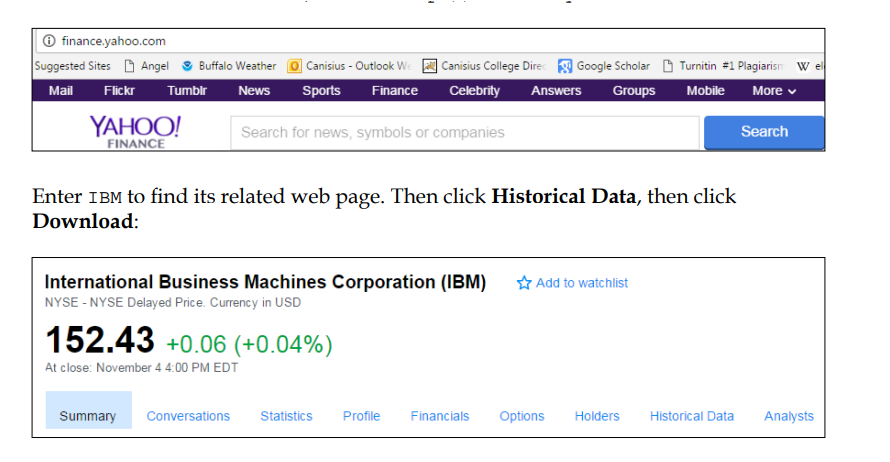

The first line shows the variable names: 
* date, 
* open price, 
* high price achieved during the trading day, 
* low price achieved during the trading day, 
* close price of the last transaction during the trading day, 
* trading volume, and 
* adjusted price for the trading day. 

The delimiter is a comma. There are several ways of loading the text file. Some methods are discussed here:

**Method I**: We could use `read_csv` from the **pandas module**:

In [27]:
import pandas as pd
x=pd.read_csv("IBM.csv")

In [28]:
x[:3]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,112.000000,113.809998,110.169998,110.930000,105.098518,6343300
1,2020-04-01,106.360001,109.919998,104.519997,105.139999,99.612892,6112900
2,2020-04-02,105.370003,110.320000,105.139999,110.000000,104.217400,6328700


**Method II**: We could use `read_table` from the **pandas module**

In [29]:
x=pd.read_table("IBM.csv",sep=',')

Alternatively, we could download the IBM daily price data directly from Yahoo!Finance

In [30]:
url='https://query1.finance.yahoo.com/v7/finance/download/IBM?period1=1585669215&period2=1617205215&interval=1d&events=history&includeAdjustedClose=true'
x=pd.read_csv(url)

In [31]:
x.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,112.000000,113.809998,110.169998,110.930000,105.098518,6343300
1,2020-04-01,106.360001,109.919998,104.519997,105.139999,99.612892,6112900
2,2020-04-02,105.370003,110.320000,105.139999,110.000000,104.217400,6328700
3,2020-04-03,108.919998,110.070000,104.919998,106.339996,100.749802,4538800
4,2020-04-06,110.349998,115.629997,110.129997,114.820000,108.784019,7034200


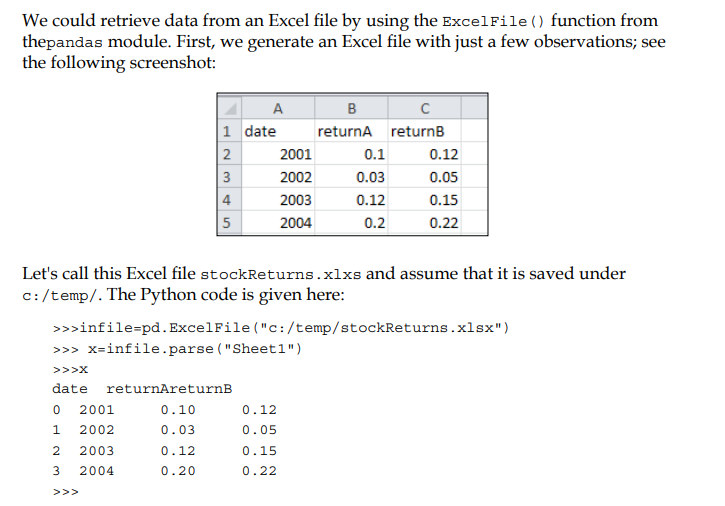

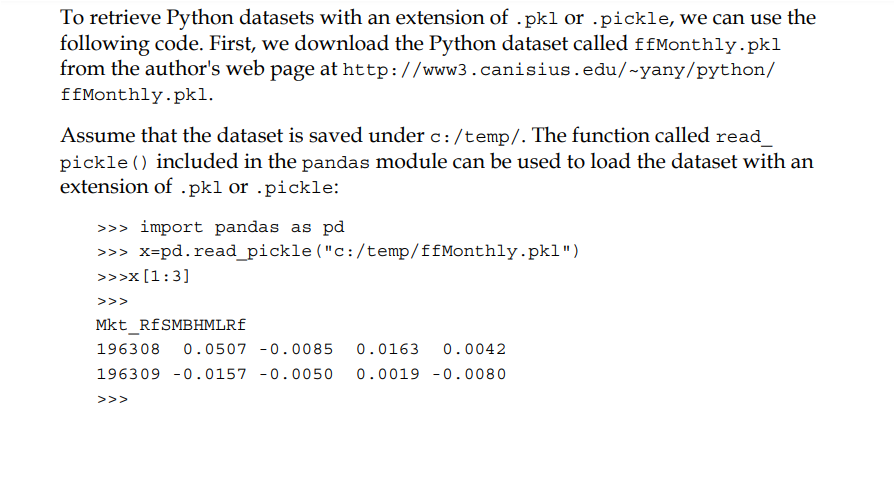

The following is the simplest `if` function: when our interest rate is negative, print a warning message:

In [32]:
if r<0:
    print("interest rate is less than zero")

Conditions related to logical `AND` and `OR` are shown here:

In [36]:
a,b = 7,3

if(a>0 and b>0):
    print("Both positive")

if(a>0 or b>0):
    print("At least one is positive")


Both positive
At least one is positive


For the multiple `if`...`elif` conditions, the following program illustrates its application by converting a number grade to a letter grade:

In [39]:
grade=74

if grade>=90:
    print('A')
elif grade >=85:
    print('A-')
elif grade >=80:
    print('B+')
elif grade >=75:
    print('B')
elif grade >=70:
    print('B-')
elif grade>=65:
    print('C+')
else:
    print('D')

B-


Note that it is a good idea for such multiple `if`...`elif` functions to end with an `else` condition since we know exactly what the result is **if none of those conditions are met**.

### Data manipulation

There are many different types of data, such as **integer**, **real number**, or **string**. The following table offers a list of those data types:

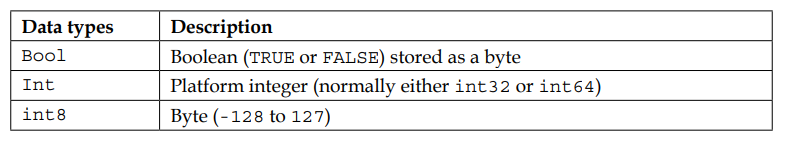

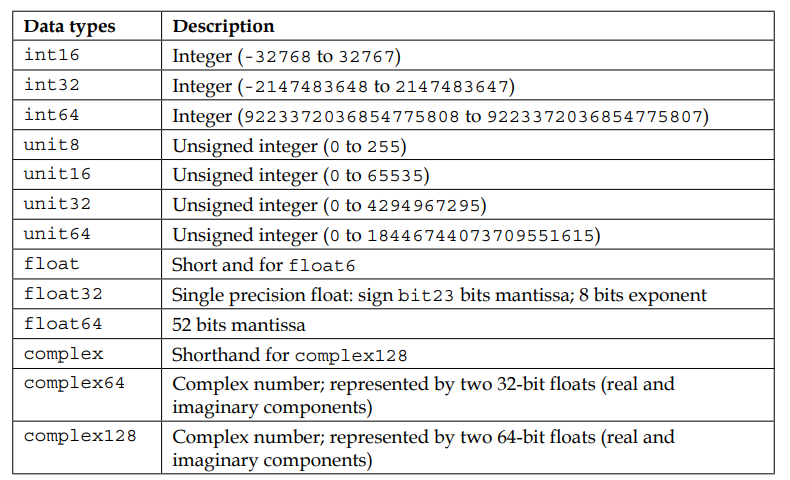

In [40]:
type(r)

float

In [42]:
pv=np.array([100,300,500])
type(pv)

numpy.ndarray

In [43]:
7/3

2.3333333333333335

In [45]:
round(7/3,5)

2.33333

For data manipulation, let's look at some simple operations:

In [47]:
a=np.zeros(10) # array with 10 zeros
b=np.zeros((3,2),dtype=float) # 3 by 2 with zeros 
c=np.ones((4,3),float) # 4 by 3 with all ones
d=np.array(range(10),float) # 0,1, 2,3 .. up to 9
e1=np.identity(4) # identity 4 by 4 matrix
e2=np.eye(4) # same as above
e3=np.eye(4,k=1) # 1 start from k
f=np.arange(1,20,3,float) # from 1 to 19 interval 3
g=np.array([[2,2,2],[3,3,3]]) # 2 by 3
h=np.zeros_like(g) # all zeros
i=np.ones_like(g) # all ones

Some so-called dot functions are quite handy and useful:

In [52]:
 x=np.array([10,20,30])
x.sum()

60

In [53]:
x=np.array([[1,2],[5,6],[7,9]])
y=x.flatten()
y

array([1, 2, 5, 6, 7, 9])

In [54]:
x2=np.reshape(y,[2,3])
x2

array([[1, 2, 5],
       [6, 7, 9]])

In [55]:
t="This is great"
t.upper()

'THIS IS GREAT'

To find out all string-related functions, we use `dir('')`

In [59]:
print(dir(str)) # or dir ("")

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


For example, from the preceding list we see a function called **split**. After typing `help(''.split)`

In [61]:
help(str.split) # help(''.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.



In [62]:
x="this is great"
x.split()

['this', 'is', 'great']

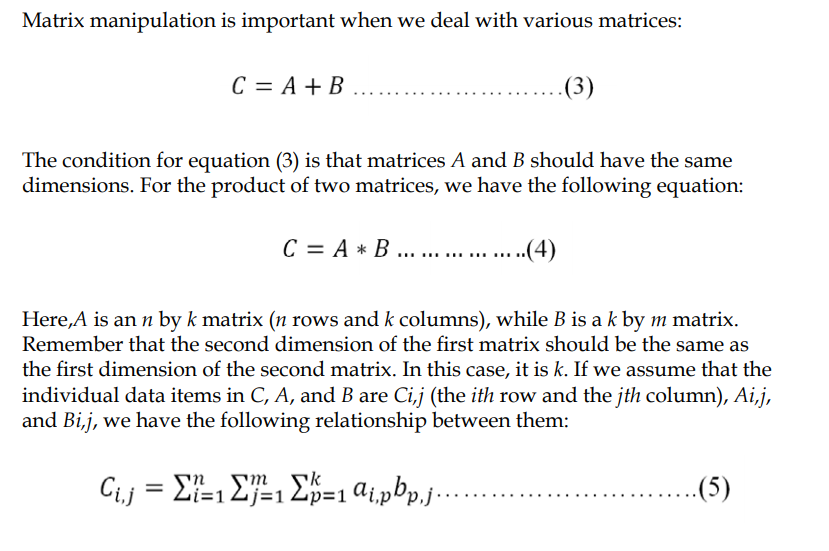

The `dot()` function from the NumPy module could be used to carry the preceding matrix multiplication:

In [63]:
a=np.array([[1,2,3],[4,5,6]],float) # 2 by 3
b=np.array([[1,2],[3,3],[4,5]],float) # 3 by 2
print(np.dot(a,b)) # 2 by 2

[[19. 23.]
 [43. 53.]]


In [64]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [65]:
b

array([[1., 2.],
       [3., 3.],
       [4., 5.]])

We could manually calculate c(1,1): `1*1 + 2*3 + 3*4=19`

After retrieving data or downloading data from the internet, we need to process it. Such a skill to process various types of raw data is vital to finance students and to professionals working in the finance industry. Here we will see how to download price data and then estimate returns.

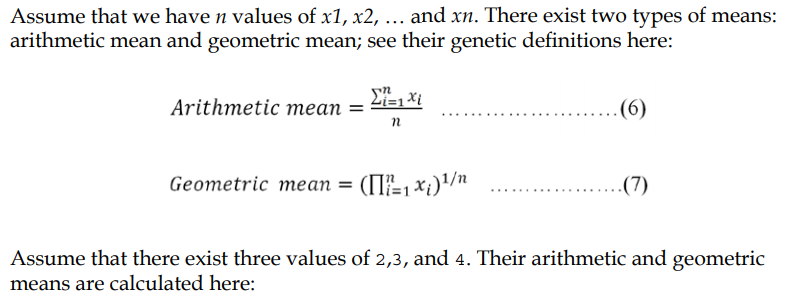

In [66]:
ar_mean = (2+3+4)/3
geo_mean= (2*3*4)**(1/3)

For returns, the arithmetic mean's definition remains the same, while the geometric mean of returns is defined differently; see the following equations:

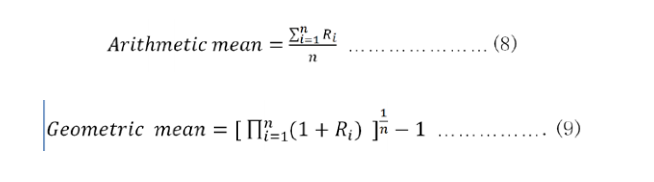

* We could say that NumPy is a basic module while SciPy is a more advanced one. 
* NumPy tries to retain all features supported by either of its predecessors, while most new features belong in SciPy rather than NumPy.

On the other hand, NumPy and SciPy have many overlapping features in terms of functions for finance. For those two types of definitions, see the following example

In [67]:
import scipy as sp

ret=sp.array([0.1,0.05,-0.02])
ret

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 0.1 ,  0.05, -0.02])

In [68]:
type(ret)

numpy.ndarray

In [69]:
sp.mean(ret)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.


0.04333333333333334

In [77]:
pow(sp.prod(ret+1),1./len(ret))-1 # pow refers exponential power

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.prod is deprecated and will be removed in SciPy 2.0.0, use numpy.prod instead
  """Entry point for launching an IPython kernel.


0.04216388706767926

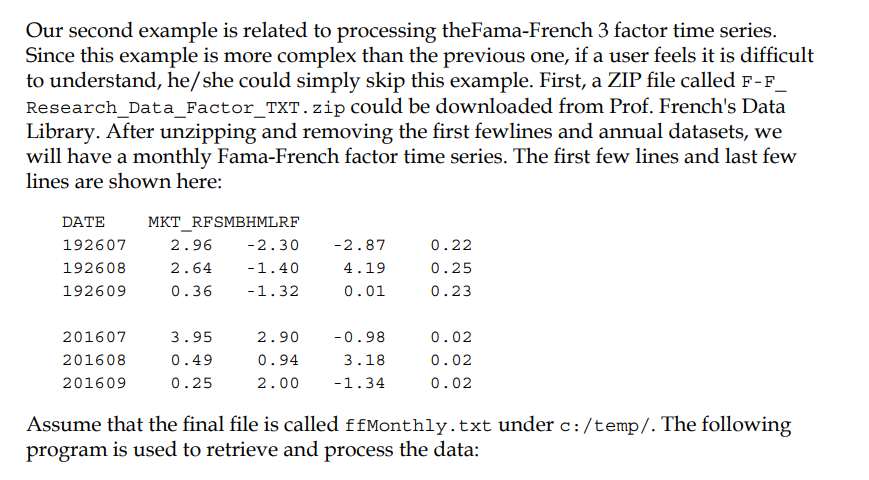

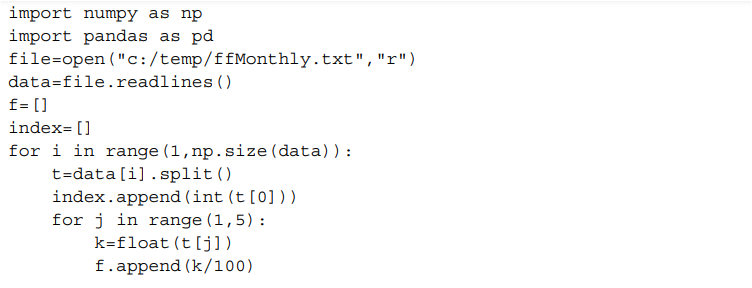

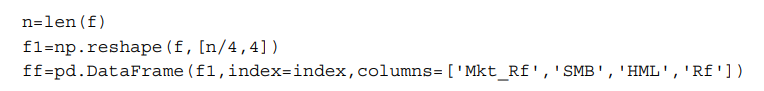

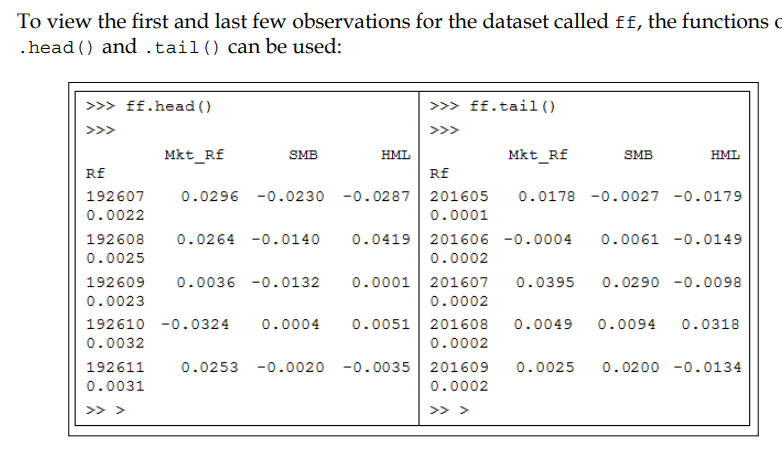

### Data output

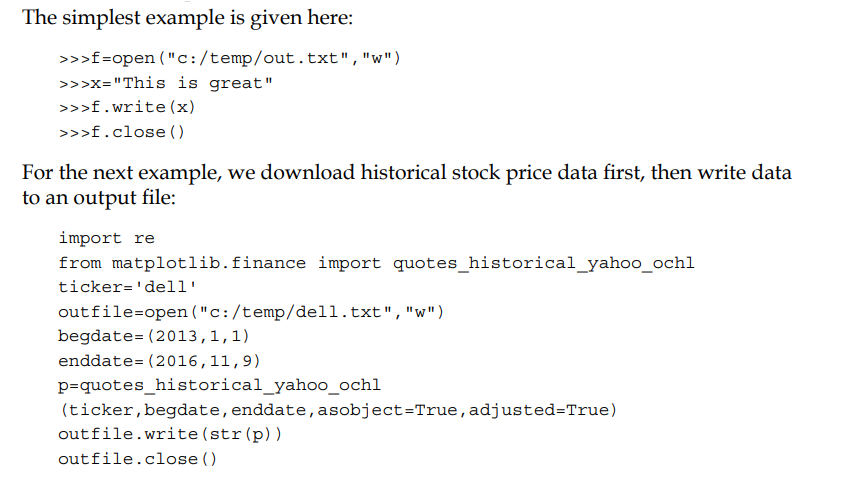

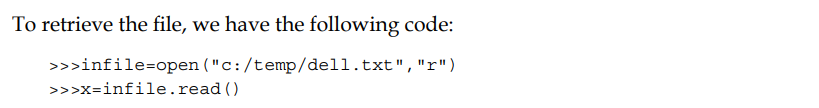

One issue is that the preceding saved text file contains many unnecessary characters, such as `and`. We could apply a substitution function called `sub()` contained in the Python module;see the simplest example given here

In [80]:
import re
re.sub("a","9","abc")

'9bc'

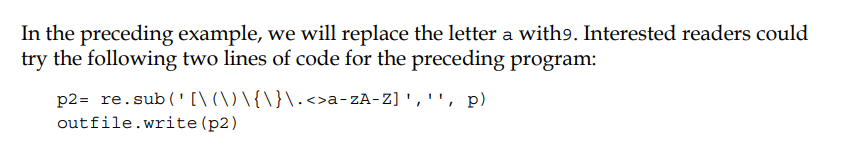

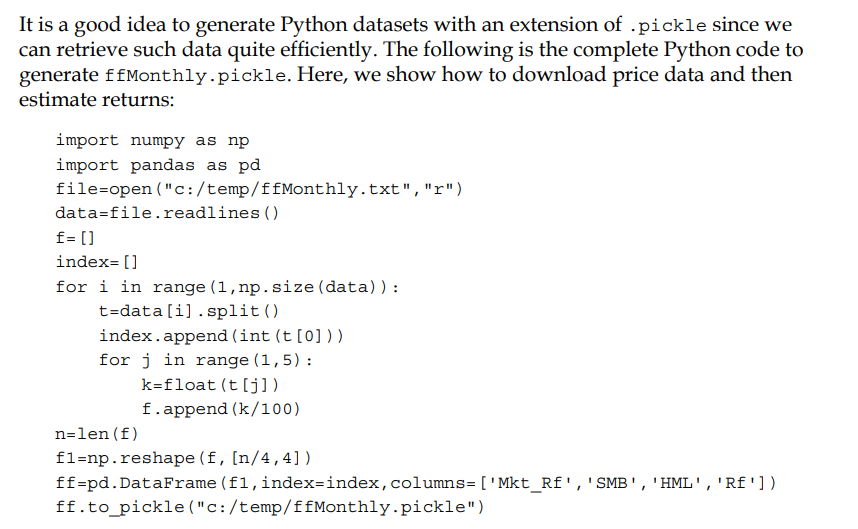